# Data Findings of Ford Go-Bike
## by Salma Youssef

## Investigation Overview

> In this investigation, I wanted to look at the average of bike trips made by different genders to see if there is some interesting relation.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. For February 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings


In [2]:
# load in the dataset into a pandas dataframe
df_bikes = pd.read_csv('201902-fordgobike-tripdata (1).csv')

df_bikes.insert(1, 'duration_minutes', df_bikes.duration_sec/60)
df_bikes.insert(2, 'duration_hours', df_bikes.duration_sec/3600)


## Trip duration in minutes 

> most trips takes < 50 minutes

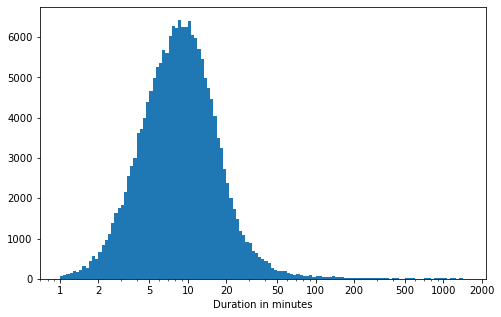

In [3]:
# dealing with the outlier, trying to see more clearly through a log scale 
new_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_bikes['duration_minutes'].max())+new_binsize, new_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_bikes, x = 'duration_minutes', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes');

## Trips frequency relative to biker gender

> male use more bikes than females by a huge percentage

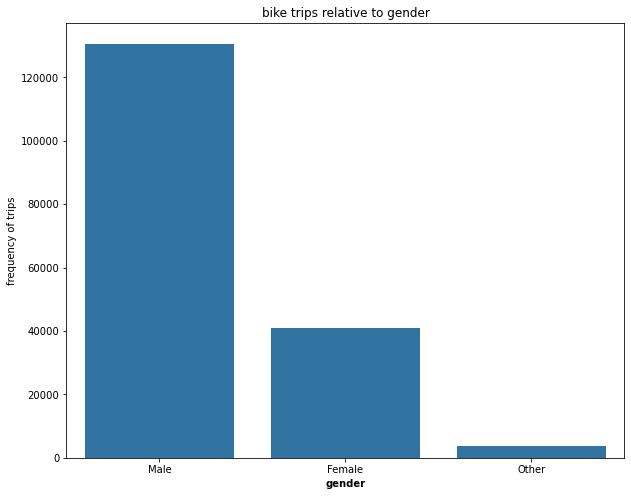

In [4]:
# now moving to member gender
plt.figure(figsize=[10, 8])
gender = df_bikes['member_gender'].value_counts().index
sb.countplot(data = df_bikes, x='member_gender', color = sb.color_palette()[0], order = gender)

plt.title('bike trips relative to gender')
plt.xlabel('gender', fontweight = 'bold' )
plt.ylabel('frequency of trips');

## Subscribers vs. Customers numbers

> number of subscribed users are greater than customers by a vast difference

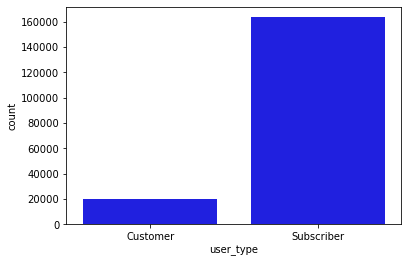

In [5]:
sb.countplot(data = df_bikes, x = 'user_type', color = 'blue');

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input